In [ ]:
pip install sklearn matplotlib

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

#For Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
pd.set_option('display.max_rows',229)

In [6]:
df = pd.read_csv('/Users/thejakamahaulpatha/PycharmProjects/Cricket Project/Dataset/New /matchstatsl.csv')

In [7]:
df.shape

(228, 11)

In [8]:
df.head()

,web-scraper-order,web-scraper-start-url,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start Date
0,1620568628-1502,https://stats.espncricinfo.com/ci/engine/stats...,Sri Lanka,DNB,0.0,-,0,n/r,v Zimbabwe,Bulawayo,21 Nov 2016
1,1620568628-1485,https://stats.espncricinfo.com/ci/engine/stats...,Sri Lanka,121,27.0,4.48,2,lost,v England,The Oval,28 Jun 2011
2,1620568650-1656,https://stats.espncricinfo.com/ci/engine/stats...,Sri Lanka,208/7,49.0,4.24,2,won,v Bangladesh,Dhaka,6 Mar 2014
3,1620568650-1637,https://stats.espncricinfo.com/ci/engine/stats...,Sri Lanka,223/9,49.2,4.52,1,won,v South Africa,Colombo (RPS),23 Jul 2013
4,1620568650-1600,https://stats.espncricinfo.com/ci/engine/stats...,Sri Lanka,248/8,49.4,4.99,2,won,v Pakistan,Colombo (RPS),18 Jun 2012


In [9]:
#Remove the first rows with '-' as it as no result and cannot convert to int as well

#Create a null array to include the indexes where '-' exists
index = []
for i in range(len(df.index)):
    if df['RPO'].values[i] == "-":
        index.append(i)

# Drop the rows where the '-' is located
for j in index:
    df = df.drop(j)

df['RPO'].unique()   
    

array(['4.48', '4.24', '4.52', '4.99', '5.28', '5.00', '4.73', '5.37',
       '5.04', '5.63', '5.92', '4.88', '4.60', '7.14', '6.41', '5.74',
       '4.91', '3.89', '6.40', '6.24', '7.84', '4.53', '4.98', '6.00',
       '3.82', '5.62', '5.17', '4.80', '5.86', '5.08', '5.48', '4.26',
       '4.11', '5.06', '4.31', '5.02', '4.38', '4.96', '4.64', '6.39',
       '5.72', '6.32', '4.85', '5.94', '4.81', '4.54', '4.34', '5.15',
       '5.77', '2.13', '4.89', '3.91', '3.75', '6.14', '7.32', '3.56',
       '3.98', '5.84', '4.30', '5.98', '5.21', '4.28', '4.22', '3.85',
       '4.20', '5.53', '5.60', '6.34', '4.14', '6.04', '5.65', '3.23',
       '5.89', '6.28', '5.46', '4.00', '5.97', '7.26', '4.86', '5.41',
       '4.43', '6.29', '6.20', '5.43', '2.79', '4.65', '6.59', '6.18',
       '5.16', '6.11', '5.10', '5.45', '4.72', '6.64', '4.97', '4.42',
       '4.39', '6.44', '7.36', '6.65', '4.10', '4.59', '5.12', '6.60',
       '3.83', '4.40', '5.59', '4.58', '7.00', '5.57', '3.50', '6.43',
      

In [10]:
df.shape

(223, 11)

In [12]:
result1 = df['Result'].unique()
result1

array(['lost', 'won', 'n/r', 'tied'], dtype=object)

<AxesSubplot:>

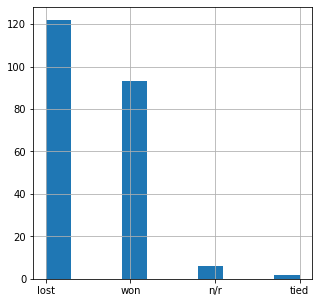

In [9]:
#Histogram for Result
df['Result'].hist(figsize = (5, 5))

In [10]:
# Let's replace these values with int
df['Result'].replace({"n/r": int(2), "lost": int(0),"won":int(1),"tied":int(3)}, inplace=True)

In [11]:
result2 = df['Opposition'].unique()
result2

array(['v England', 'v Bangladesh', 'v South Africa', 'v Pakistan',
       'v New Zealand', 'v India', 'v Australia', 'v Afghanistan',
       'v West Indies', 'v Ireland', 'v Zimbabwe', 'v Scotland'],
      dtype=object)

<AxesSubplot:>

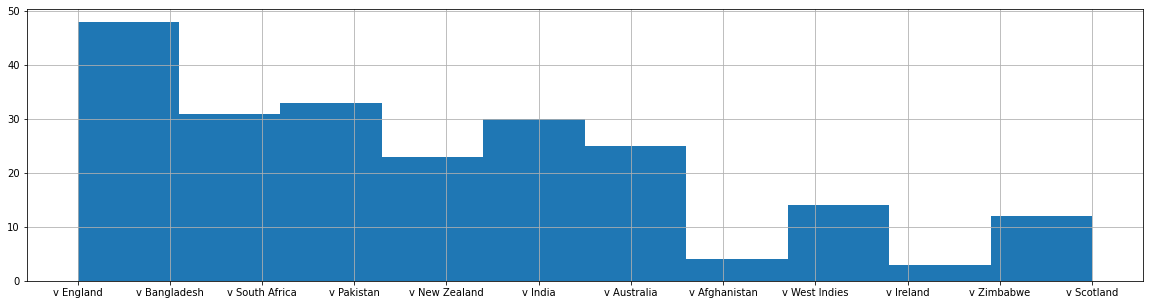

In [12]:
#Histogram for Opposition
df['Opposition'].hist(figsize = (20, 5))

In [13]:
# Let's replace these values with int
for i in range(len(result2)):
    df['Opposition'].replace({result2[i]: int(i)}, inplace=True)

In [14]:
result3 = df['Ground'].unique()
result3

array(['The Oval', 'Dhaka', 'Colombo (RPS)', 'Hamilton',
       'Hyderabad (Deccan)', 'Cardiff', 'Dambulla', 'Christchurch',
       'Centurion', 'Abu Dhabi', 'Pallekele', 'Wellington', 'Durban',
       'Port of Spain', 'Hobart', 'Kimberley', 'Hambantota',
       'North Sound', 'Port Elizabeth', 'Birmingham', 'Ahmedabad',
       'Dublin', 'Bristol', 'Leeds', 'Harare', 'Karachi', 'Dunedin',
       "Lord's", 'Paarl', 'Sharjah', 'Brisbane', 'Sydney', 'Nottingham',
       'Manchester', 'Kingston', 'Fatullah', 'Galle', 'Johannesburg',
       'Dubai (DSC)', 'Mount Maunganui', 'Nelson', 'Perth', 'Adelaide',
       'Melbourne', 'Ranchi', 'Edinburgh', 'Chester-le-Street',
       'Colombo (SSC)', 'Cape Town', 'Mohali', 'Bulawayo',
       'Dublin (Malahide)', 'Dharamsala', 'Cuttack', 'Kolkata',
       'East London', 'Visakhapatnam', 'Bloemfontein'], dtype=object)

<AxesSubplot:>

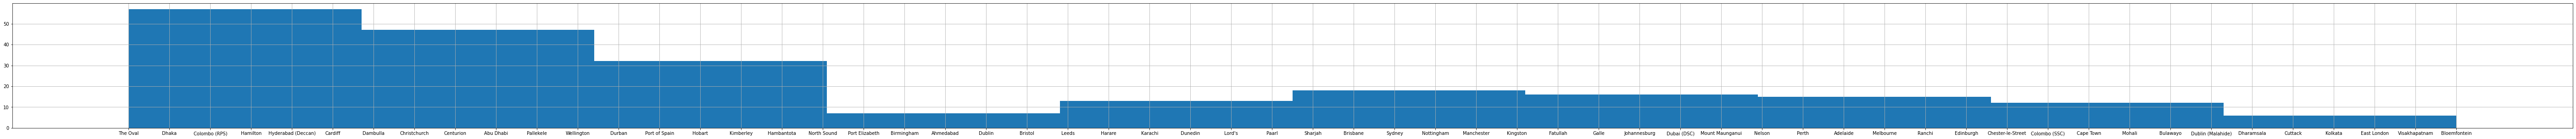

In [15]:
#Histogram for Ground
df['Ground'].hist(figsize = (100, 5))

In [16]:
# Let's replace these values with int
for i in range(len(result3)):
    df['Ground'].replace({result3[i]: int(i)}, inplace=True)

In [17]:
df.dtypes

web-scraper-order         object
web-scraper-start-url     object
Team                      object
Score                     object
Overs                    float64
RPO                       object
Inns                       int64
Result                     int64
Opposition                 int64
Ground                     int64
Start Date                object
dtype: object

In [18]:
df['RPO'].unique()

array(['4.48', '4.24', '4.52', '4.99', '5.28', '5.00', '4.73', '5.37',
       '5.04', '5.63', '5.92', '4.88', '4.60', '7.14', '6.41', '5.74',
       '4.91', '3.89', '6.40', '6.24', '7.84', '4.53', '4.98', '6.00',
       '3.82', '5.62', '5.17', '4.80', '5.86', '5.08', '5.48', '4.26',
       '4.11', '5.06', '4.31', '5.02', '4.38', '4.96', '4.64', '6.39',
       '5.72', '6.32', '4.85', '5.94', '4.81', '4.54', '4.34', '5.15',
       '5.77', '2.13', '4.89', '3.91', '3.75', '6.14', '7.32', '3.56',
       '3.98', '5.84', '4.30', '5.98', '5.21', '4.28', '4.22', '3.85',
       '4.20', '5.53', '5.60', '6.34', '4.14', '6.04', '5.65', '3.23',
       '5.89', '6.28', '5.46', '4.00', '5.97', '7.26', '4.86', '5.41',
       '4.43', '6.29', '6.20', '5.43', '2.79', '4.65', '6.59', '6.18',
       '5.16', '6.11', '5.10', '5.45', '4.72', '6.64', '4.97', '4.42',
       '4.39', '6.44', '7.36', '6.65', '4.10', '4.59', '5.12', '6.60',
       '3.83', '4.40', '5.59', '4.58', '7.00', '5.57', '3.50', '6.43',
      

In [19]:
#Change the data type of RPO to int
df['RPO'] = pd.to_numeric(df['RPO'])

In [20]:
df.dtypes

web-scraper-order         object
web-scraper-start-url     object
Team                      object
Score                     object
Overs                    float64
RPO                      float64
Inns                       int64
Result                     int64
Opposition                 int64
Ground                     int64
Start Date                object
dtype: object

In [21]:
# 1. Let's split the data

x = df.iloc[:,[5,8,9]].values
y = df.iloc[:,7].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1) 

In [22]:
#Creating a list with the models
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
# models.append(('LNR',LinearRegression()))
models.append(('SVM',SVC(gamma='auto')))

In [23]:
results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_results.mean(),cv_results.std()))


LR: 0.617183 (0.069564)
LDA: 0.670683 (0.004016)
KNN: 0.634610 (0.020152)
CART: 0.599039 (0.039515)
NB: 0.706397 (0.031698)
RFC: 0.652897 (0.033850)
SVM: 0.593158 (0.057444)


# Calculating Feature Importance

## 1) Permutation Importance

In [ ]:
#Permutation Importance
# A way to compute feature importances for any black-box estimator by 
#measuring how score decreases when a feature is not available; the method is also 
#known as “permutation importance” or “Mean Decrease Accuracy (MDA)”.


In [24]:
# Lets find what feature is more important

Feature: 0, Score: 0.06786
Feature: 1, Score: 0.02143
Feature: 2, Score: -0.01429


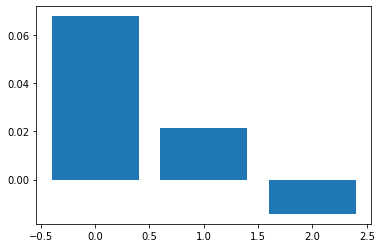

In [26]:
#Now Let's Try with our selected best case of GaussianNB

model = GaussianNB()
# fit the model
model.fit(x_train, y_train)

# get importance
imps = permutation_importance(model, x_test, y_test)

importance = imps.importances_mean

# summarize feature importance
for i,v in enumerate(imps.importances_mean):
#     print(importance[i])
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## 2) Feature Importance

In [ ]:
#Feature importance gives you a score for each feature of your data, 
#the higher the score more important or relevant is the feature towards your output variable.
#Feature importance is an inbuilt class that comes with Tree Based Classifiers, 

Feature: 0, Score: 0.50402
Feature: 1, Score: 0.18459
Feature: 2, Score: 0.31139


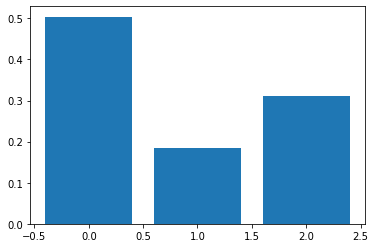

In [27]:
#Now Let's Try with our selected second best case of RandomForestClassifier

model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
#     print(importance[i])
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# The RPO has the most significance 